In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data <- read.csv("donnees-synop-essentielles-omm.csv", sep = ";", header = TRUE)
head(data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


In [3]:
colnames(data)

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

In [8]:
install.packages("maps")

Installing package into ‘/home/oclaich/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)



In [ ]:
library(maps)

In [7]:
head(data$`Nebulosité.totale`, 100)

[1] 100  90 100  NA 100 100 100  NA  NA  NA 100  75 100  NA  NA 100  25   0
 [19]  NA 100 100 100 101 101  40  90  90 100  NA  25  90  NA 100  NA  NA  NA
 [37] 101  NA  NA  NA  NA 100  NA  75  90  NA  NA  NA 100  NA 100  NA  NA  90
 [55]  90  NA  NA  NA   0  40  NA 100  NA  NA  NA  NA 100 100  NA  NA  NA  75
 [73] 100 100 100 100  NA  90  10  NA  NA  NA  NA  NA 100  NA  10  NA  NA   0
 [91]  NA 100  90 100  NA  NA 100  NA  NA  90

In [4]:
length(unique(data$Coordonnees))

[1] 62

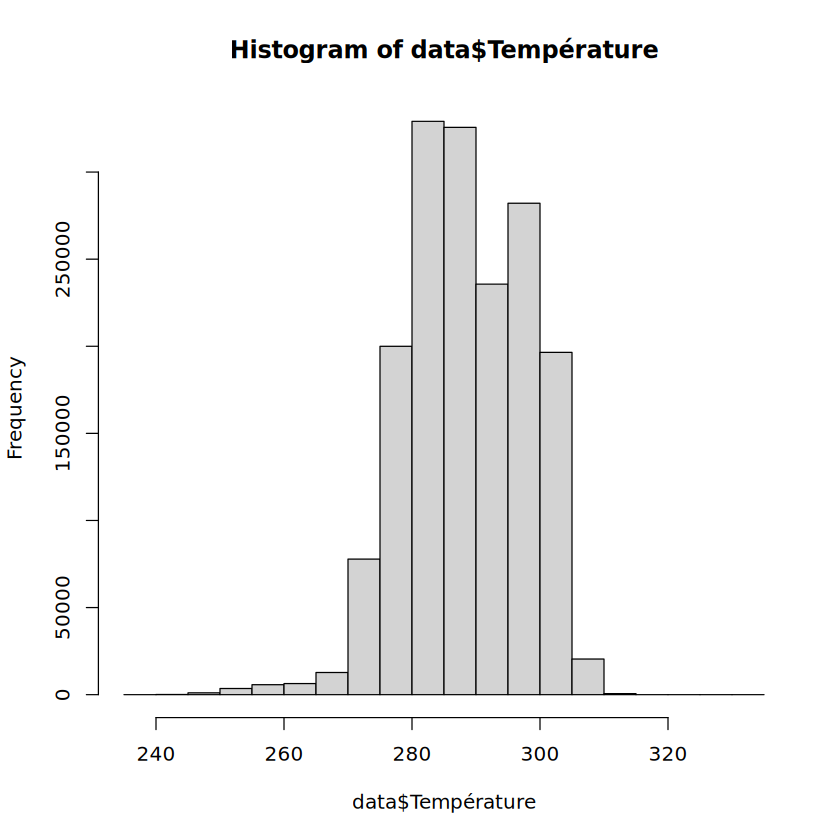

In [4]:
par(bg = "white") # Définit le fond blanc pour le graphique
hist(data$`Température`)

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


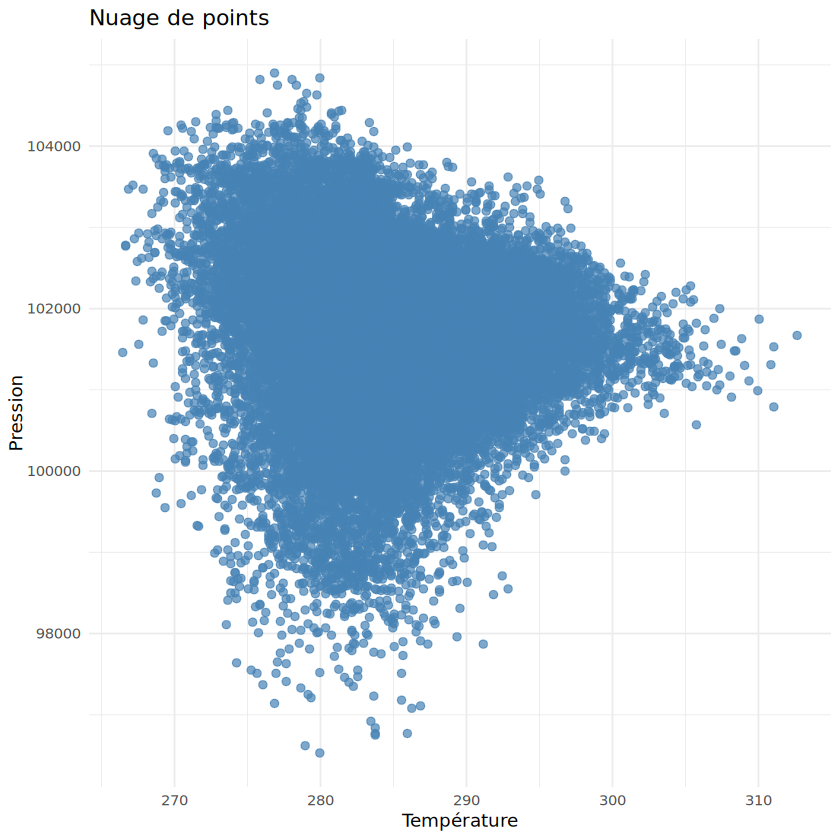

In [5]:
data_calvados <- data %>%
  filter(data$department..name. == "Calvados")

ggplot(data_calvados, aes(x = `Température`, y = Pression.au.niveau.mer)) +
  geom_point(color = "steelblue", alpha = 0.7, size = 2) +
  theme_minimal() +
  labs(x = "Température", y = "Pression", title = "Nuage de points")

In [6]:
summary(data)

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000               
 NA's   :40694                     NA's   :68236                
 Directi

In [7]:
dim(data)

[1] 1719567      82

In [8]:
data[which.min(data$Altitude), ]

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
33,7643,2017-01-27T16:00:00+01:00,101680,-170,6,120,12.3,285.25,280.35,72,⋯,2,Mauguio,34154,CA du Pays de l'Or,243400470,Hérault,34,Occitanie,76,1


In [9]:
max(data$Date)
min(data$Date)

[1] "2025-09-03T23:00:00+02:00"

[1] "2015-08-04T02:00:00+02:00"

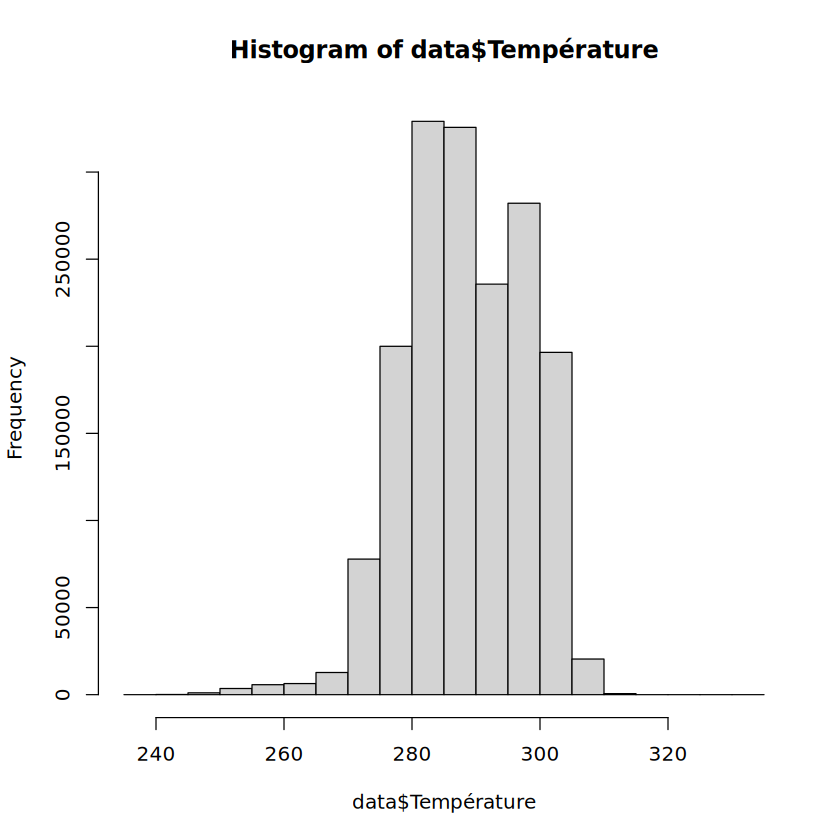

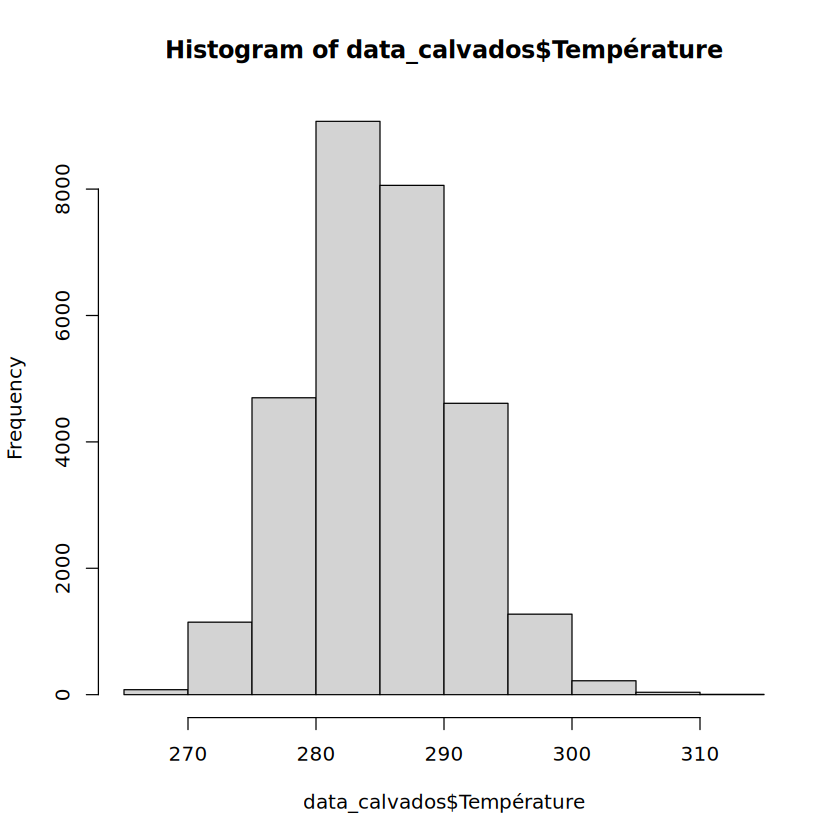

In [10]:
data_calvados <- data %>%
  filter(data$department..name. == "Calvados")
  
par(bg = "white") # Définit le fond blanc pour le graphique
hist(data$`Température`)
hist(data_calvados$`Température`)

Warning message:
“Removed 22176 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 22176 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


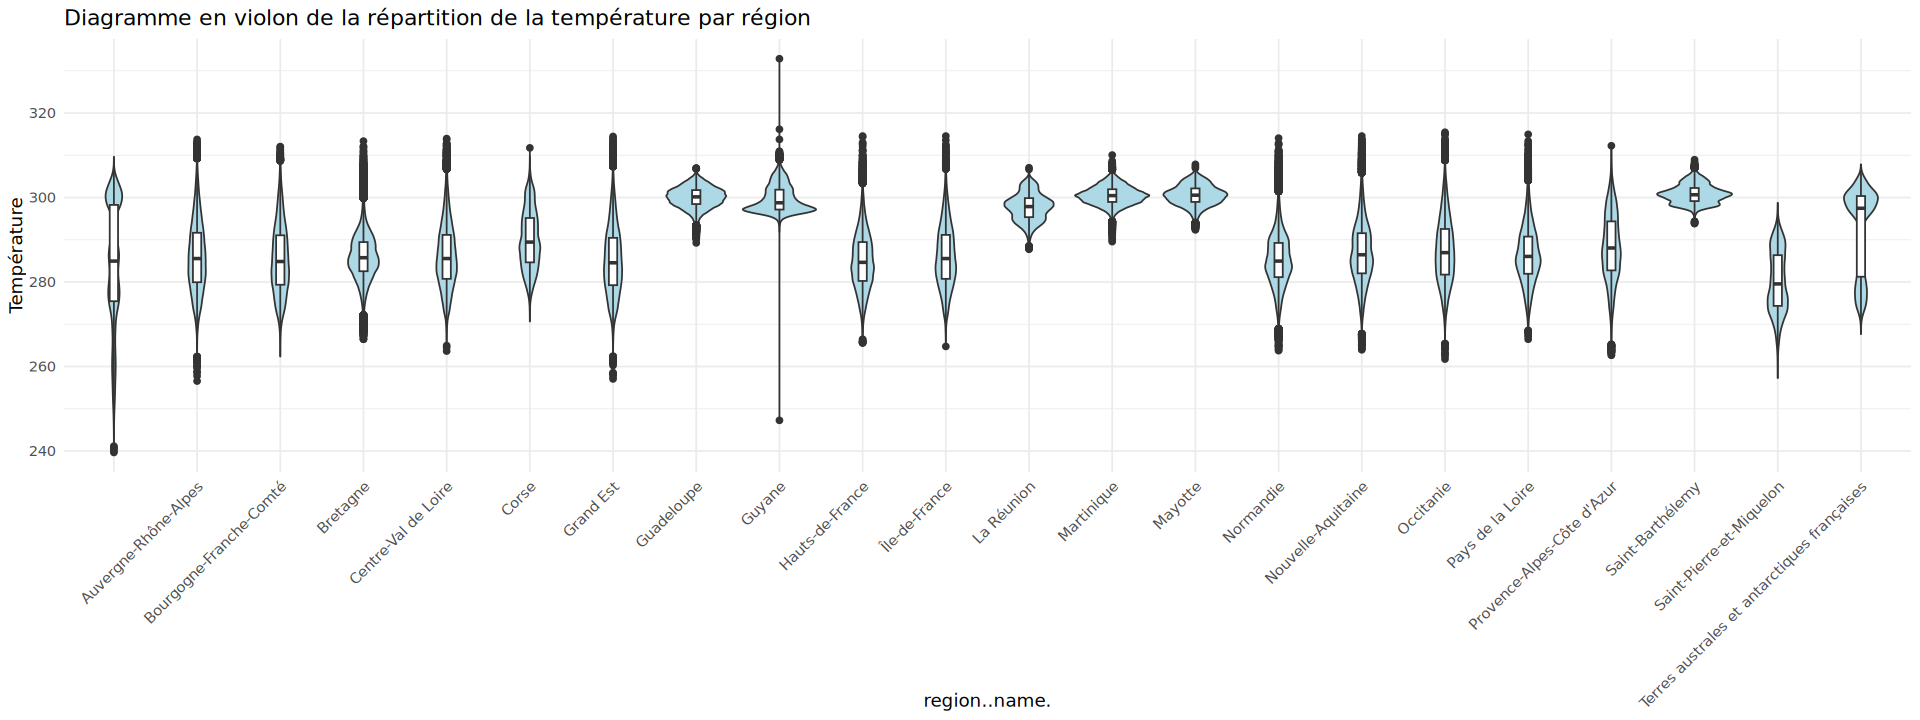

In [11]:
options(repr.plot.width = 16, repr.plot.height = 6)

ggplot(data, aes(x = region..name., y = `Température`)) +
  geom_violin(trim = TRUE, fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "white") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Diagramme en violon de la répartition de la température par région")

On remarque que les régions d'Outre-Mer présentent (à part Saint-Pierre et Miquelon et les Terres australes et antarctiques) des valeurs de température bien plus élevées que les autres régions. On peut penser que ce sera également le cas pour les autres variables de ce jeu de données (en tout cas elles seront différentes), et ce sera à prendre en compte dans notre étude